In [31]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# 그래프 스타일 설정
plt.style.use("seaborn")

In [33]:
! pip install PyMySQL

In [34]:
import pymysql.cursors

In [35]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [36]:
connection

In [37]:
cursor = connection.cursor()

In [38]:
cursor

In [39]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 카카오의 종가 조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '035720'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2020-12-30'
"""  

In [40]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

494

In [41]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [42]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('102000.000'),
  'DT': datetime.date(2019, 1, 2),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('102500.000'),
  'DT': datetime.date(2019, 1, 3),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('103500.000'),
  'DT': datetime.date(2019, 1, 4),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('103000.000'),
  'DT': datetime.date(2019, 1, 7),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('99900.000'),
  'DT': datetime.date(2019, 1, 8),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('102000.000'),
  'DT': datetime.date(2019, 1, 9),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('101000.000'),
  'DT': datetime.date(2019, 1, 10),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('102000.000'),
  'DT': datetime.date(2019, 1, 11),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('100000.000'),
  'DT': datetime.date(2019, 1, 14),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('99900.000'),
  'DT': datetime.date(2019, 1, 15),
  'STK_CD': '035720'},
 {'C_PRC': Decimal('100000.000'),
  'DT': datetime.date(2019, 1, 16),
  'STK_C

In [43]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [45]:
df

,STK_CD,DT,C_PRC
0,035720,2019-01-02,102000.000
1,035720,2019-01-03,102500.000
2,035720,2019-01-04,103500.000
3,035720,2019-01-07,103000.000
4,035720,2019-01-08,99900.000
...,...,...,...
489,035720,2020-12-23,377500.000
490,035720,2020-12-24,374000.000
491,035720,2020-12-28,373000.000
492,035720,2020-12-29,384500.000


In [46]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  494 non-null    object
 1   DT      494 non-null    object
 2   C_PRC   494 non-null    object
dtypes: object(3)
memory usage: 11.7+ KB


In [48]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [50]:
# C_PRC 컬럼의 타입을 정수로 변환
df.loc[: , "C_PRC" ] = df.loc[: , "C_PRC" ].astype(int)

In [52]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  494 non-null    object        
 1   DT      494 non-null    datetime64[ns]
 2   C_PRC   494 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.7+ KB


In [54]:
# 종가의 기술 통계 값
df["C_PRC"].describe()

count       494.000000
mean     202204.655870
std      100561.245295
min       95600.000000
25%      129500.000000
50%      154500.000000
75%      284750.000000
max      412000.000000
Name: C_PRC, dtype: float64

In [56]:
# 종가 분산
df["C_PRC"].var()

10112564055.358004

In [57]:
# 표준편차 == 분산에 루트 
# np.sqrt() : 루트 계산
# 분산에 루트를 계산하면 표준편차
np.sqrt(df["C_PRC"].var())

100561.24529538208

In [58]:
# 분산에 0.5 승을 해도 표준편차
df["C_PRC"].var() ** 0.5

100561.24529538208

In [60]:
# 종가의 표준편차
df["C_PRC"].std()

100561.24529538208

In [62]:
df

,STK_CD,DT,C_PRC
0,035720,2019-01-02,102000
1,035720,2019-01-03,102500
2,035720,2019-01-04,103500
3,035720,2019-01-07,103000
4,035720,2019-01-08,99900
...,...,...,...
489,035720,2020-12-23,377500
490,035720,2020-12-24,374000
491,035720,2020-12-28,373000
492,035720,2020-12-29,384500


In [64]:
# 20일간 종가의 이동평균

# rolling(20).mean() : 20일간의 이동 평균을 계산하는 함수
df["MA20"] = df["C_PRC"].rolling(20).mean()

In [65]:
df.head(50)

,STK_CD,DT,C_PRC,MA20
0,035720,2019-01-02,102000,NaN
1,035720,2019-01-03,102500,NaN
2,035720,2019-01-04,103500,NaN
3,035720,2019-01-07,103000,NaN
4,035720,2019-01-08,99900,NaN
5,035720,2019-01-09,102000,NaN
6,035720,2019-01-10,101000,NaN
7,035720,2019-01-11,102000,NaN
8,035720,2019-01-14,100000,NaN
9,035720,2019-01-15,99900,NaN


In [66]:
# 20일간 주가의 표준편차
df["stddev"] = df["C_PRC"].rolling(20).std()

In [67]:
df.head(50)

,STK_CD,DT,C_PRC,MA20,stddev
0,035720,2019-01-02,102000,NaN,NaN
1,035720,2019-01-03,102500,NaN,NaN
2,035720,2019-01-04,103500,NaN,NaN
3,035720,2019-01-07,103000,NaN,NaN
4,035720,2019-01-08,99900,NaN,NaN
5,035720,2019-01-09,102000,NaN,NaN
6,035720,2019-01-10,101000,NaN,NaN
7,035720,2019-01-11,102000,NaN,NaN
8,035720,2019-01-14,100000,NaN,NaN
9,035720,2019-01-15,99900,NaN,NaN


In [68]:
# 상위 밴드
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)

In [69]:
# 하위밴드
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

In [70]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB
0,035720,2019-01-02,102000,NaN,NaN,NaN,NaN
1,035720,2019-01-03,102500,NaN,NaN,NaN,NaN
2,035720,2019-01-04,103500,NaN,NaN,NaN,NaN
3,035720,2019-01-07,103000,NaN,NaN,NaN,NaN
4,035720,2019-01-08,99900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
489,035720,2020-12-23,377500,374550.0,5335.827268,385221.654536,363878.345464
490,035720,2020-12-24,374000,374550.0,5335.827268,385221.654536,363878.345464
491,035720,2020-12-28,373000,374550.0,5335.827268,385221.654536,363878.345464
492,035720,2020-12-29,384500,375375.0,5541.411088,386457.822175,364292.177825


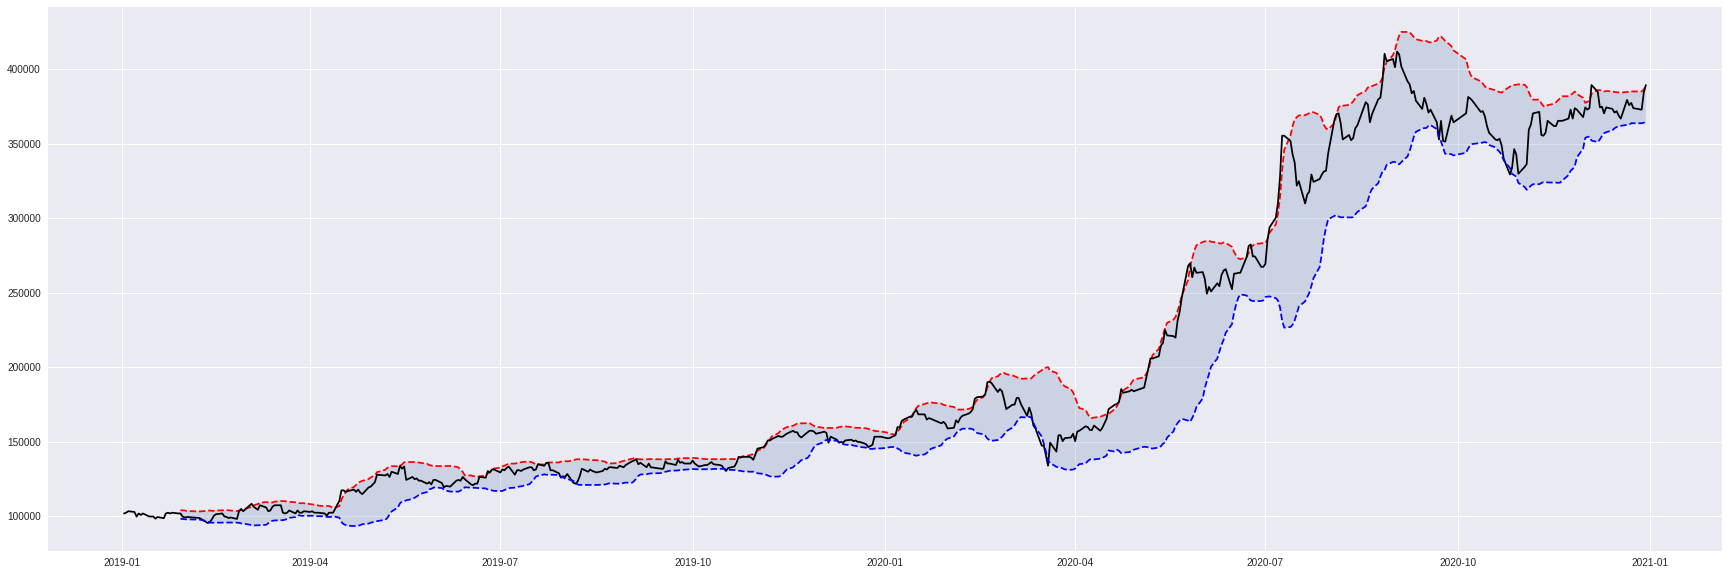

In [71]:
# pyplot을 통해 볼린저밴드를 시각화 합니다.

# 그래프의 크기 가로 30 세로 10
plt.figure(figsize=(30, 10))
# 상위 밴드 : 주식의 가격이 움직이는 밴드의 상위값 (빨강색으로 표시)
plt.plot(df.DT, df.UpperB, "r--")
# 실제 주식의 가격 (종가) : 검정색
plt.plot(df.DT, df.C_PRC, "k")
# 하위밴드 : 주식이 움직이는 가격이 움직이는 밴드의 하위값 (하위값)
plt.plot(df.DT, df.LowerB, "b--")

# 각 날짜의 df.LowerB(하위밴드) ~ df.UpperB (상위밴드) 사이를 색을 칠함
plt.fill_between(df.DT, df.LowerB, df.UpperB, alpha=0.2)

In [72]:
# PercentB = (종가 - 하위밴드) / (상위밴드 - 하위밴드)
df["PercentB"] = (df["C_PRC"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])

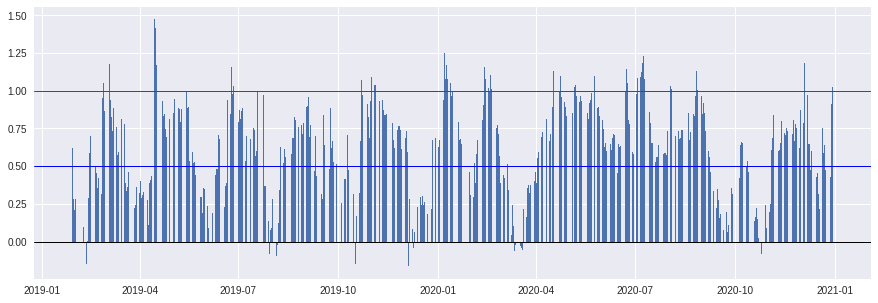

In [73]:
# 밴드 내에서 주가의 상대적인 위치를 시각화 합니다.
# 1보다 크면 밴드폭 상단을 돌파한 것이고
# 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.

# 그래프의 크기 가로 15 세로 5
plt.figure(figsize=(15, 5))
# 밴드내에서 주가의 상대 위치를 막대 그래프로 출력
plt.bar(df.DT, df["PercentB"])

# 1 지점에 선그림 (빨강색) -> 1보다 크면 밴드폭 상단을 돌파한 것이고
plt.axhline(1, c="r", lw=1)
# 0.5 지점에 선그림 (파랑색)
plt.axhline(0.5, c="b", lw=1)
# 0 지점에 선그림 (검정색) -> 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.
plt.axhline(0, c="k", lw=1)